# Visualizador de Datos Médicos

*Análisis del Proyecto:*

🎯 Este proyecto tiene como objetivo el análisis de datos médicos, centrándose en la identificación de factores de riesgo como el sobrepeso, colesterol, glucosa, y enfermedades cardiovasculares, además de explorar las relaciones entre variables a través de visualizaciones.

In [1]:
# Importamos las librerías necesarias
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


📌 *1.	Importe los datos de 'medical_examination.csv' y asígnelos a la variable df.*

In [2]:
#cargamos la data
df = pd.read_csv('medical_examination.csv', index_col='id')
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


    sex = sexo(0: mujer, 1:hombre)
    ap_hi = Presión arterial sistólica
    ap_lo = Presión arterial diastólica
    cholesterol	= colesterol
    gluc = glucosa 
    smoke = fumador (0:no, 1:yes)
    alco =  consumo de alcohol (0:no, 1:yes)
    active = actividad física (0:no, 1:yes)
    cardio = Presencia o ausencia de enfermedades cardiovasculares (0:no, 1:yes)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [4]:
df['sex'].value_counts()

sex
1    45522
2    24467
3       11
Name: count, dtype: int64

In [5]:
#corregimos variable valores de  la variable 'sex'
# replace (2, 0)
#replace (3,0)
df['sex'] = df['sex'].astype(str)
df['sex'] = df['sex'].str.replace('2','0')
df['sex'] = df['sex'].str.replace('3','0')
df['sex'] = df['sex'].astype(int)

In [6]:
df['sex'].value_counts() #perfecto

sex
1    45522
0    24478
Name: count, dtype: int64

📌 *2.	Cree la columna sobrepeso en la variable df.*

In [7]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
# paso 1: calculando el índice de masa corporal

df['height_mts'] =  df['height']/100
df['IMC'] = df['weight'] / (df['height_mts']**2)

# paso 2: calculando la variable sobre peso 'overweight' 
# > 25: 1(tiene sobre peso), <25:0( no tiene sobre peso)
df['overweight'] = df['IMC'].apply(lambda x: 1 if x > 25 else 0)
df.head()


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_mts,IMC,overweight
id,,,,,,,,,,,,,,,
0,18393,0,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,23.507805,0
3,17623,0,169,82.0,150,100,1,1,0,0,1,1,1.69,28.710479,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,23.011177,0


In [9]:
count_overweight = df['overweight'].value_counts()
porcentaje_overweight = (df['overweight'].value_counts()/df['overweight'].shape[0])*100

print(f"""En este set de datos la cantidad y porcentaje de personas con sobre peso es:\n
Count overweight: {count_overweight}\nPercentage: {porcentaje_overweight}""")

En este set de datos la cantidad y porcentaje de personas con sobre peso es:

Count overweight: overweight
1    43546
0    26454
Name: count, dtype: int64
Percentage: overweight
1    62.208571
0    37.791429
Name: count, dtype: float64


📌 *3. Normalice los datos haciendo que 0 sea siempre bueno y 1 siempre malo. Si el valor de colesterol o glucosa es 1, establezca el valor en 0. Si el valor es mayor que 1, establezca el valor en 1.*

In [10]:
#revisando colesterol
df[['cholesterol','gluc']].value_counts()

cholesterol  gluc
1            1       48672
2            1        6729
3            1        4078
             3        3472
2            2        2439
1            2        2235
             3        1478
3            2         516
2            3         381
Name: count, dtype: int64

In [11]:
#reemplazando en 'cholesterol y gluc' 1 = 0
#reemplazando en 'cholesterol y gluc' ~1 = 1

#reemplanzado en cholesterol
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)

#reemplanzado en gluc
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)



In [12]:
#comprobando valores
print(df['gluc'].value_counts())
print(df['cholesterol'].value_counts())

gluc
0    59479
1    10521
Name: count, dtype: int64
cholesterol
0    52385
1    17615
Name: count, dtype: int64


📌 *4. Dibuje el gráfico categórico en la función draw_cat_plot, countplot*

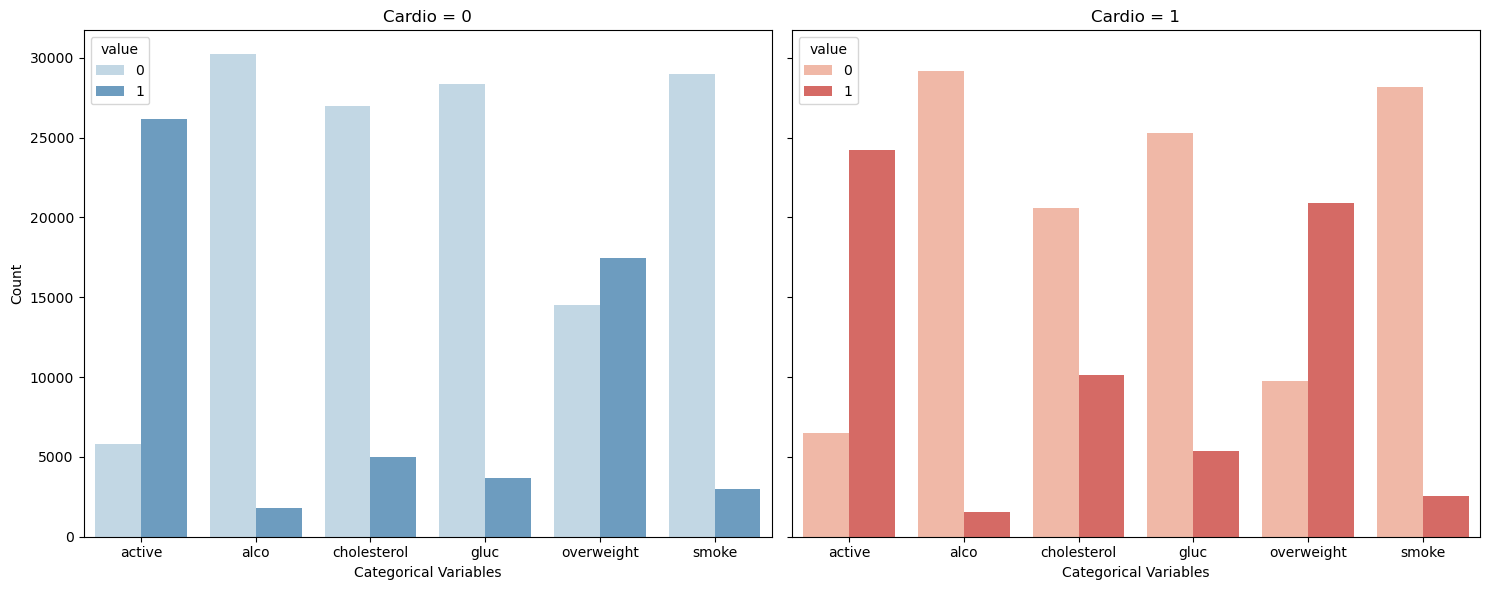

In [19]:
# Variables categóricas a analizar
categorical_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']

# Convertir los datos al formato long usando pd.melt()
df_long = pd.melt(df, id_vars=['cardio'], value_vars=categorical_vars, 
                  var_name='variable', value_name='value')

# Filtrar los datos por cardio
df_cardio_0 = df_long[df_long['cardio'] == 0]
df_cardio_1 = df_long[df_long['cardio'] == 1]

# Crear dos gráficos: uno para cardio = 0 y otro para cardio = 1
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Gráfico para cardio = 0
sns.countplot(data=df_cardio_0, x='variable', hue='value',palette= 'Blues', ax=axes[0], alpha = 0.8)
axes[0].set_title('Cardio = 0')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Categorical Variables')

# Gráfico para cardio = 1
sns.countplot(data=df_cardio_1, x='variable', hue='value',palette= 'Reds', ax=axes[1], alpha = 0.8)
axes[1].set_title('Cardio = 1')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Categorical Variables')

# Ajustar el diseño para que no se sobrepongan los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

📌 *Pregunta 5: Limpiar los datos. Filtrar los siguientes segmentos de pacientes que representan datos
incorrectos:*

        o La presión diastólica es más alta que la sistólica (Mantenga los datos correctos con (df['ap_lo'] <= df['ap_hi']))
        o La altura es menor que el percentil 2,5 (mantenga los datos correctos con (df['height'] >= df['height'].quantile(0.025)))
        o La altura es mayor que el percentil 97,5
        o El peso es menor que el percentil 2,5
        o El peso es mayor que el percentil 97,5


    ap_hi = Presión arterial sistólica
    ap_lo = Presión arterial diastólica

In [14]:
print(f'Before',df.shape)
#La presión diastólica(ap_lo) es más alta que la sistólica(ap_hi)(datos incorrectos)
# (Mantenga los datos correctos con (df['ap_lo'] <= df['ap_hi']))
df = df[df['ap_lo'] <= df['ap_hi']]
print(df.shape)

#La altura es menor que el percentil 2,5(datos incorrectos)-(mantenga los datos correctos con (df['height'] >= df['height'].quantile(0.025)))
df = df[df['height'] >= df['height'].quantile(0.025)]
print(df.shape)

#La altura es mayor que el percentil 97,5(datos incorrectos)
df = df[df['weight'] <= df['weight'].quantile(0.975)]
print(df.shape)

#El peso es menor que el percentil 2,5(datos incorrectos)
df = df[df['weight'] >= df['weight'].quantile(0.025)]
print(df.shape)

#El peso es mayor que el percentil 97,5(datos incorrectos)
df = df[df['weight'] <= df['weight'].quantile(0.975)]

print(f'After',df.shape)

Before (70000, 15)
(68766, 15)
(67260, 15)
(65581, 15)
(64104, 15)
After (62680, 15)


In [15]:
quartil = df['height'].quantile(0.025)
quartil

152.0

📌 eliminar la variable creada 'height_mts' y 'IMC'

In [16]:
print(df.shape)
df = df.drop(columns=['height_mts','IMC'])
print(df.shape)

(62680, 15)
(62680, 13)


📌 *6 .- Cree una matriz de correlación utilizando el conjunto de datos. Dibuje la matriz de
correlación utilizando heatmap() de Seaborn. Enmascare el triángulo superior. El
gráfico debería verse como Figure_2.png.*

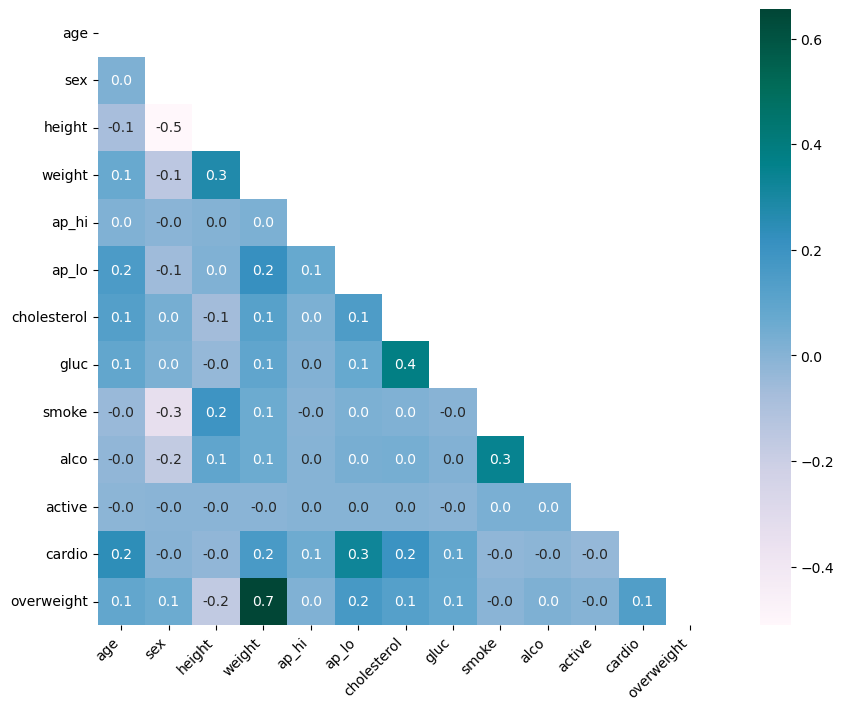

In [17]:
#crear un dataframe para hacer el mapa de calor
df_heat = df

#crear la matriz de correlacion
corr = df_heat.corr()

#crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

#características del gráfico
plt.figure(figsize=(12,8))

#gráficando mapa de calor
sns.heatmap(corr, mask= mask, annot= True, fmt=".1f", cmap="PuBuGn", square= True) 

plt.xticks(rotation = 45, ha= 'right') #Alinear etiquetas del eje x 45° a la derecha
plt.yticks(rotation = 0)  # Alinear las etiquetas del eje Y horizontalmente

plt.show()


🎯 Conclusiones:

*1. Datos*: Importación de 70,000 pacientes; variables completas; corrección de 'sex'.

*2: Sobrepeso:* 62.2% de pacientes con sobrepeso (IMC calculado), lo que podría ser un indicador de problemas de salud relacionados.

*3. Normalización:* Colesterol y glucosa; 1 = normal, >1 = anormal. Esto permite una mejor interpretación en análisis posteriores.

*4.Visualización:* Gráficos comparativos de actividad física, alcohol, colesterol, glucosa, sobrepeso y tabaquismo en enfermedades 
cardiovasculares. Esto ayuda a identificar patrones de comportamiento en diferentes grupos.

*5.Limpieza:* Filtrado de registros erróneos; reducción a 62,680 registros.

*6. Correlación:* Matriz de correlación para identificar relaciones entre variables. Esto ayuda a identificar factores que pueden estar asociados con enfermedades cardiovasculares, permitiendo un análisis más profundo y decisiones informadas.
